# Project--Restaurant_Revenue_prediction_model

In this project, you are going to work on the "Restaurant revenue" dataset which
contains 100 observations of restaurants with 8 attributes.

# Problem Statement:

Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.

# Dataset Attributes:

1. ID - Restaurant ID
2. Name - Name of the Restaurant
3. Franchise - Restaurant has franchise or not
4. Category - specific type of category provided by restaurant
5. No_of_item - Different types of items provided by restaurant
6. Order_Placed - Order placed by customer to restaurant (in lacs)
7. Revenue - Total amount of income generated by the restaurant

# Tasks To Be Performed:
    
In this project, you have to predict the restaurant revenue based on the
independent features using a machine learning algorithm of your own choice.


In [1]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Load the dataset**

In [4]:
df=pd.read_csv("revenue_prediction.csv")
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [5]:
df.shape

(100, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


**Examining missing values in a dataset**

In [7]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

**Drop irrelevant columns**

In [8]:
df=df.drop(columns=["Id","Name","Franchise","Category","City","No_Of_Item"])

In [9]:
df.head()

,Order_Placed,Revenue
0,5.5,5953753
1,6.8,7223131
2,1.9,2555379
3,2.5,2175511
4,4.2,4816715


In [10]:
df.shape

(100, 2)

**Create independent feature and dependent variable**

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values  

**Split the dataset into Training set and Test set**

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_train.shape)

(80, 1)
(20, 1)
(80,)
(80,)


**Training the Simple Linear Regression model on the Training set**

In [14]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Predicting the Test set results**

In [15]:
y_pred=regressor.predict(x_test)

In [16]:
y_pred

array([6351103.23642516, 5984998.65773576, 4032440.90472562,
       3788371.18559936, 4276510.62385189, 3910406.04516249,
       4032440.90472562, 3666336.32603622, 3788371.18559936,
       6107033.5172989 , 5740928.93860949, 2934127.16865742,
       3178196.88778369, 2079883.15171548, 3422266.60690995,
       4520580.34297816, 4642615.20254129, 1469708.85389981,
       1347673.99433668, 1713778.57302608])

**Visualising the Training set results**

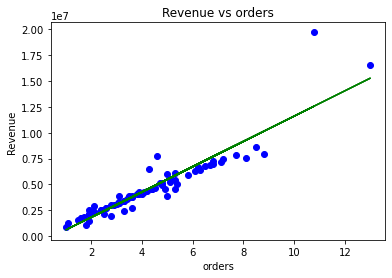

In [18]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")
plt.show()

**Visualising the Test set results**

Text(0, 0.5, 'Revenue')

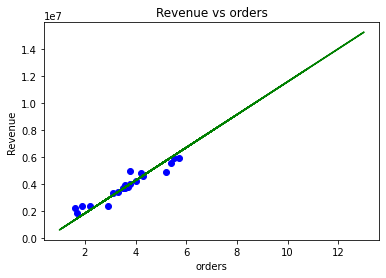

In [19]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,regressor.predict(x_train),color="green")
plt.title("Revenue vs orders")
plt.xlabel("orders")
plt.ylabel("Revenue")

**Accuracy of the Model**

In [20]:
from sklearn.metrics import*

In [22]:
mse = mean_squared_error(y_test,y_pred)
mse

186768572957.3925

In [23]:
print('Accuracy of LinearRegression Model : ',r2_score(y_test,y_pred)*100)
print('Root_Mean_Squared_Error of LinearRegression Model : ',np.sqrt(mse))

Accuracy of LinearRegression Model :  87.24481996270595
Root_Mean_Squared_Error of LinearRegression Model :  432167.2974177853


In [24]:
error = pd.DataFrame(np.c_[y_test,y_pred],columns =['Actual_values','Predicted_values'])
error

,Actual_values,Predicted_values
0,5966193.0,6.351103e+06
1,5595267.0,5.984999e+06
2,3982767.0,4.032441e+06
3,3752885.0,3.788371e+06
4,4264176.0,4.276511e+06
5,3818055.0,3.910406e+06
6,4956086.0,4.032441e+06
7,3727364.0,3.666336e+06
8,3945135.0,3.788371e+06
9,5953753.0,6.107034e+06


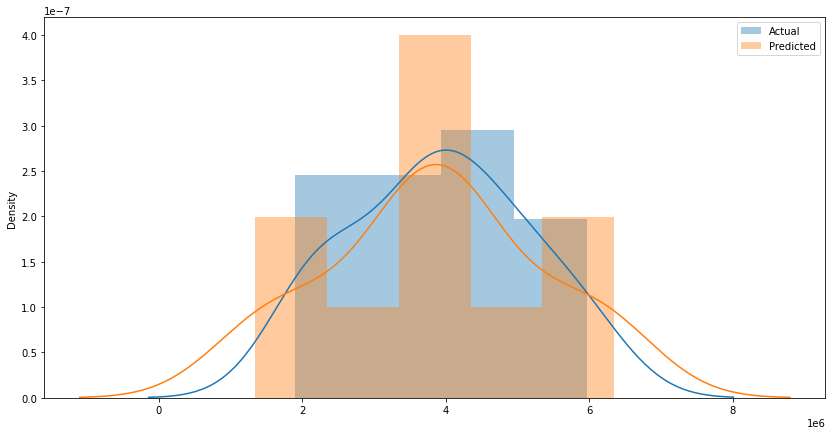

In [25]:
plt.figure(figsize=(14,7))
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend();

Insight-->More than 87% of times our model predicted the value right & Rmse is 43216 which is higher.

# DecisionTreeRegressor Model

In [26]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [28]:
dtr.fit(x_train,y_train)
y_pred1 = dtr.predict(x_test)
mse = mean_squared_error(y_test,y_pred1)

In [29]:
print('Accuracy of DecisionTreeRegressor Model : ',r2_score(y_test,y_pred1)*100)
print('Root_Mean_Squared_Error of DecisionTree Model : ',np.sqrt(mse))

Accuracy of DecisionTreeRegressor Model :  75.78994547389088
Root_Mean_Squared_Error of DecisionTree Model :  595396.7881544656


Insight--> LinearRegression model predict more accurate revenue compared to decision tree regressor model.So i recommend LinearRegression model for restaurant revenue prediction.

THANK YOU